# Problem (case study)


## Data Description

The data is from an insurance company, about their customers and the different policies they each have. 

## Goal

My Goal is to train a model to predict 'Income' 

# Getting Data

In [1]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)
import math
import warnings
warnings.filterwarnings('ignore')
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import OneHotEncoder

%matplotlib inline

## Read the .csv file

In [2]:
data = pd.read_csv("C:\\Users\\jw156\Ironhack\\Day5\\lab-customer-analysis-final-round\\files_for_lab\\csv_files\\marketing_customer_analysis.csv")
data.head(5)

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,Location Code,Marital Status,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,Suburban,Single,94,13,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,Suburban,Married,108,18,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,Suburban,Married,106,18,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,Rural,Single,73,12,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


# Cleaning/Wrangling/EDA


## Change headers names

In [3]:
columns_titles = [data.columns[i].lower() for i in range(len(data.columns))]

columns_titles[7] = 'employment status'
columns_titles
data.columns = columns_titles

data_2 = data.drop(['customer', 'effective to date'], axis=1)
data_2



,state,customer lifetime value,response,coverage,education,employment status,gender,income,location code,marital status,monthly premium auto,months since last claim,months since policy inception,number of open complaints,number of policies,policy type,policy,renew offer type,sales channel,total claim amount,vehicle class,vehicle size
0,Washington,2763.519279,No,Basic,Bachelor,Employed,F,56274,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,Arizona,6979.535903,No,Extended,Bachelor,Unemployed,F,0,Suburban,Single,94,13,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,Nevada,12887.431650,No,Premium,Bachelor,Employed,F,48767,Suburban,Married,108,18,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,California,7645.861827,No,Basic,Bachelor,Unemployed,M,0,Suburban,Married,106,18,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,Washington,2813.692575,No,Basic,Bachelor,Employed,M,43836,Rural,Single,73,12,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,California,23405.987980,No,Basic,Bachelor,Employed,M,71941,Urban,Married,73,18,89,0,2,Personal Auto,Personal L1,Offer2,Web,198.234764,Four-Door Car,Medsize
9130,California,3096.511217,Yes,Extended,College,Employed,F,21604,Suburban,Divorced,79,14,28,0,1,Corporate Auto,Corporate L3,Offer1,Branch,379.200000,Four-Door Car,Medsize
9131,California,8163.890428,No,Extended,Bachelor,Unemployed,M,0,Suburban,Single,85,9,37,3,2,Corporate Auto,Corporate L2,Offer1,Branch,790.784983,Four-Door Car,Medsize
9132,California,7524.442436,No,Extended,College,Employed,M,21941,Suburban,Married,96,34,3,0,3,Personal Auto,Personal L2,Offer3,Branch,691.200000,Four-Door Car,Large


## Deal with NaN values

In [4]:
data_3 = data_2.dropna()
data_3 = data_3.reset_index(drop=True)
data_3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 22 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   state                          9134 non-null   object 
 1   customer lifetime value        9134 non-null   float64
 2   response                       9134 non-null   object 
 3   coverage                       9134 non-null   object 
 4   education                      9134 non-null   object 
 5   employment status              9134 non-null   object 
 6   gender                         9134 non-null   object 
 7   income                         9134 non-null   int64  
 8   location code                  9134 non-null   object 
 9   marital status                 9134 non-null   object 
 10  monthly premium auto           9134 non-null   int64  
 11  months since last claim        9134 non-null   int64  
 12  months since policy inception  9134 non-null   i

## Categorical Features

In [5]:
categorical_data = data_3.select_dtypes(include=np.object)
categorical_data

,state,response,coverage,education,employment status,gender,location code,marital status,policy type,policy,renew offer type,sales channel,vehicle class,vehicle size
0,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,California,No,Basic,Bachelor,Employed,M,Urban,Married,Personal Auto,Personal L1,Offer2,Web,Four-Door Car,Medsize
9130,California,Yes,Extended,College,Employed,F,Suburban,Divorced,Corporate Auto,Corporate L3,Offer1,Branch,Four-Door Car,Medsize
9131,California,No,Extended,Bachelor,Unemployed,M,Suburban,Single,Corporate Auto,Corporate L2,Offer1,Branch,Four-Door Car,Medsize
9132,California,No,Extended,College,Employed,M,Suburban,Married,Personal Auto,Personal L2,Offer3,Branch,Four-Door Car,Large


## Numerical Features

In [6]:
numerical_data = data_3.select_dtypes(include = np.number)
numerical_data

,customer lifetime value,income,monthly premium auto,months since last claim,months since policy inception,number of open complaints,number of policies,total claim amount
0,2763.519279,56274,69,32,5,0,1,384.811147
1,6979.535903,0,94,13,42,0,8,1131.464935
2,12887.431650,48767,108,18,38,0,2,566.472247
3,7645.861827,0,106,18,65,0,7,529.881344
4,2813.692575,43836,73,12,44,0,1,138.130879
...,...,...,...,...,...,...,...,...
9129,23405.987980,71941,73,18,89,0,2,198.234764
9130,3096.511217,21604,79,14,28,0,1,379.200000
9131,8163.890428,0,85,9,37,3,2,790.784983
9132,7524.442436,21941,96,34,3,0,3,691.200000


## Exploration

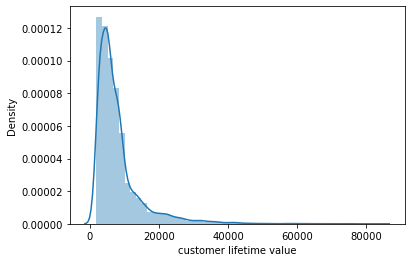

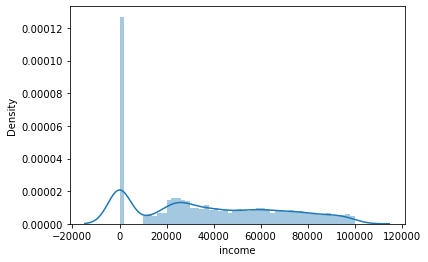

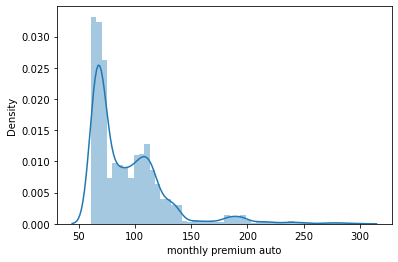

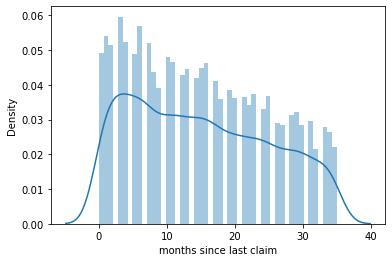

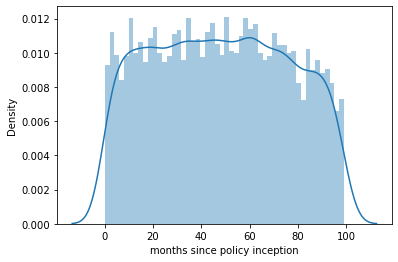

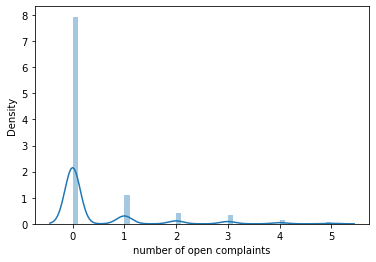

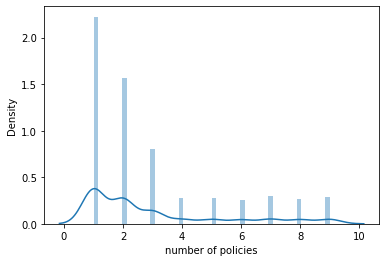

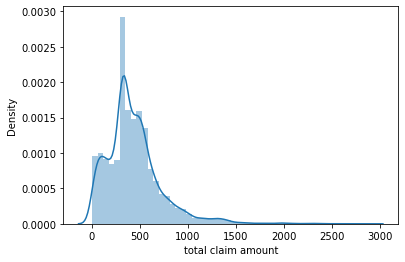

In [7]:
def display_distplot(column_title, bins):
    return sns.distplot(numerical_data[column_title], bins=bins)

for i, column_title in enumerate(numerical_data.columns):
    plt.figure(i)
    display_distplot(column_title, 50)

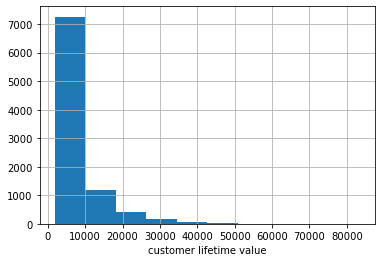

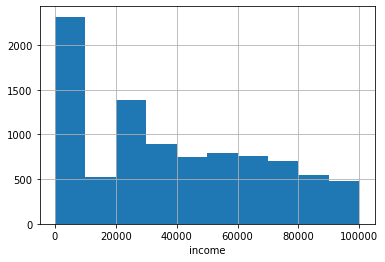

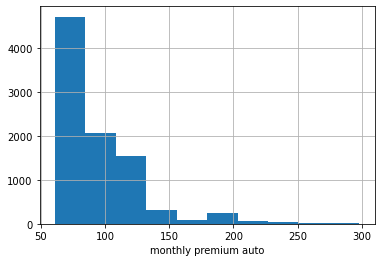

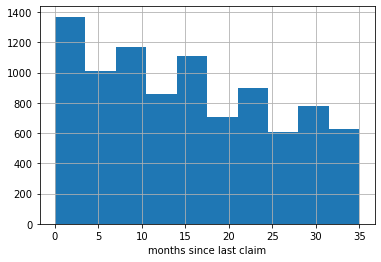

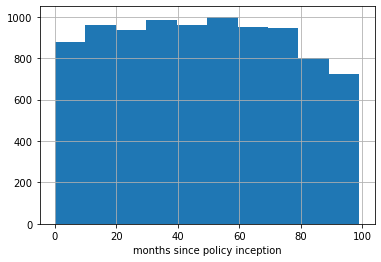

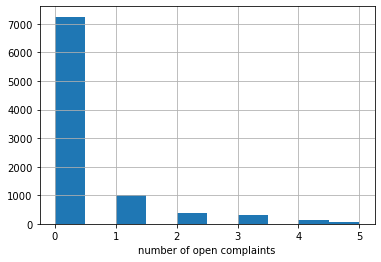

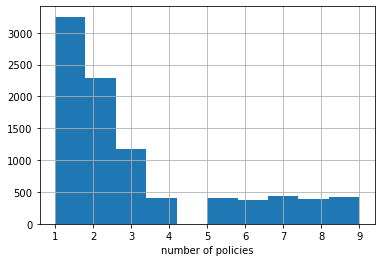

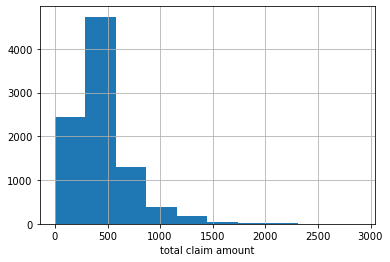

In [8]:
def display_histograms(column_title):
    return numerical_data[column_title].hist()

for i, column_title in enumerate(numerical_data.columns):
    plt.figure(i)
    plt.xlabel(column_title)
    display_histograms(column_title)

# Processing Data

## Dealing with outliers

### Removing NaN values for 'income' & Replace with mean

In [9]:
columns_drops = numerical_data[numerical_data['income'].isin([0]) ==True]
mean_income = np.mean(numerical_data['income'])

numerical_data['income']=numerical_data['income'].mask(numerical_data['income']==0).fillna(mean_income)
numerical_data['income']= numerical_data['income'].fillna(mean_income)
data_3['income'] = numerical_data['income']

In [10]:
data_3.head(5)

,state,customer lifetime value,response,coverage,education,employment status,gender,income,location code,marital status,monthly premium auto,months since last claim,months since policy inception,number of open complaints,number of policies,policy type,policy,renew offer type,sales channel,total claim amount,vehicle class,vehicle size
0,Washington,2763.519279,No,Basic,Bachelor,Employed,F,56274.000000,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,Arizona,6979.535903,No,Extended,Bachelor,Unemployed,F,37657.380009,Suburban,Single,94,13,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,Nevada,12887.431650,No,Premium,Bachelor,Employed,F,48767.000000,Suburban,Married,108,18,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,California,7645.861827,No,Basic,Bachelor,Unemployed,M,37657.380009,Suburban,Married,106,18,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,Washington,2813.692575,No,Basic,Bachelor,Employed,M,43836.000000,Rural,Single,73,12,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


## Splitting into train set and test set

In [11]:
Y = data_3['customer lifetime value']
data_4 = data_3.drop(['customer lifetime value'], axis=1)

x_numerical = data_4.select_dtypes(include = np.number)
x_categorical = data_4.select_dtypes(include = np.object)

## Normalization

In [12]:
transformer = Normalizer().fit(x_numerical)
x_normalized = transformer.transform(x_numerical)

numerical_normalised_df = pd.DataFrame(x_normalized)
# numerical_normalised_df.columns = x_numerical.columns
numerical_normalised_df.columns = x_numerical.columns
numerical_normalised_df.head(5)

,income,monthly premium auto,months since last claim,months since policy inception,number of open complaints,number of policies,total claim amount
0,0.999976,0.001226,0.000569,0.000089,0.0,0.000018,0.006838
1,0.999545,0.002495,0.000345,0.001115,0.0,0.000212,0.030033
2,0.999930,0.002214,0.000369,0.000779,0.0,0.000041,0.011615
3,0.999895,0.002815,0.000478,0.001726,0.0,0.000186,0.014070
4,0.999993,0.001665,0.000274,0.001004,0.0,0.000023,0.003151


## Encoding Categorical Data

In [13]:
encode_x = OneHotEncoder(handle_unknown='error', drop='first').fit(x_categorical)
encode_x_array=encode_x.transform(categorical_data).toarray()
encode_x_array

# encode_x.fit(categorical_data) 
# encode_x.categories_

# encode_x_array=encode_x.transform(categorical_data).toarray()
# encode_x_array

array([[0., 0., 0., ..., 1., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 1., 0., ..., 1., 1., 0.],
       ...,
       [1., 0., 0., ..., 0., 1., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 1., 1., 0.]])

In [14]:
x_numerical.head(5)
encode_x_array_df = pd.DataFrame(encode_x_array)
encode_x_array_df.head(5)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [15]:
encode_x.get_feature_names()
# columns_titles = [data.columns[i].lower() for i in range(len(data.columns))]
# column_titles = [x_categorical.columns[i].append(x_category[i]) for i in range(len(x_categorical))]
col_list=[]

for i in x_categorical:
    col_list.append(x_categorical[i].unique())
    
encode_x_array_df.columns = list(encode_x.get_feature_names())
encode_x_array_df.head(10)

,x0_California,x0_Nevada,x0_Oregon,x0_Washington,x1_Yes,x2_Extended,x2_Premium,x3_College,x3_Doctor,x3_High School or Below,x3_Master,x4_Employed,x4_Medical Leave,x4_Retired,x4_Unemployed,x5_M,x6_Suburban,x6_Urban,x7_Married,x7_Single,x8_Personal Auto,x8_Special Auto,x9_Corporate L2,x9_Corporate L3,x9_Personal L1,x9_Personal L2,x9_Personal L3,x9_Special L1,x9_Special L2,x9_Special L3,x10_Offer2,x10_Offer3,x10_Offer4,x11_Branch,x11_Call Center,x11_Web,x12_Luxury Car,x12_Luxury SUV,x12_SUV,x12_Sports Car,x12_Two-Door Car,x13_Medsize,x13_Small
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
5,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
6,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
8,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
9,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


## Concat DataFrames


In [16]:
X = pd.concat([numerical_normalised_df, encode_x_array_df], axis=1)
X.head(5)

,income,monthly premium auto,months since last claim,months since policy inception,number of open complaints,number of policies,total claim amount,x0_California,x0_Nevada,x0_Oregon,x0_Washington,x1_Yes,x2_Extended,x2_Premium,x3_College,x3_Doctor,x3_High School or Below,x3_Master,x4_Employed,x4_Medical Leave,x4_Retired,x4_Unemployed,x5_M,x6_Suburban,x6_Urban,x7_Married,x7_Single,x8_Personal Auto,x8_Special Auto,x9_Corporate L2,x9_Corporate L3,x9_Personal L1,x9_Personal L2,x9_Personal L3,x9_Special L1,x9_Special L2,x9_Special L3,x10_Offer2,x10_Offer3,x10_Offer4,x11_Branch,x11_Call Center,x11_Web,x12_Luxury Car,x12_Luxury SUV,x12_SUV,x12_Sports Car,x12_Two-Door Car,x13_Medsize,x13_Small
0,0.999976,0.001226,0.000569,0.000089,0.0,0.000018,0.006838,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
1,0.999545,0.002495,0.000345,0.001115,0.0,0.000212,0.030033,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.999930,0.002214,0.000369,0.000779,0.0,0.000041,0.011615,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
3,0.999895,0.002815,0.000478,0.001726,0.0,0.000186,0.014070,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,0.999993,0.001665,0.000274,0.001004,0.0,0.000023,0.003151,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


# Modeling

## Apply model

In [17]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.3,random_state=100)


In [18]:
lm = linear_model.LinearRegression()
model = lm.fit(x_train,y_train)
predictions  = lm.predict(x_test)

# Model Validation

## R2

In [19]:
mse = mean_squared_error(y_test, predictions)
print(round(mse,2))

41670034.98


## MSE

In [20]:
rmse = math.sqrt(mse)
print(round(rmse,2))

6455.23


## RMSE

In [21]:
r2 = r2_score(y_test, predictions)
print(round(r2,2))

0.14


## MAE

In [22]:
mae = mean_absolute_error(y_test, predictions)
print(round(mae,2))

3985.7


# Reporting

## Present Results